# Test run pipeline
Starting from calints run entire pipeline and preview results plots

In [1]:
from erebus.utility.h5_serializable_file import H5Serializable
import erebus.utility.utils as utils 
from uncertainties import ufloat
from erebus.photometry_data import PhotometryData
from erebus.utility.run_cfg import ErebusRunConfig
from erebus.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhs1478b = ErebusRunConfig.load("./lhs1478b_run.yaml")

In [3]:
erebus = Erebus(lhs1478b, force_clear_cache=True)

Loading data from calints in /mnt/c/Users/nicho/Research/GitHub/erebus/manual_tests/./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.93s/it]


Sorting data
Found star at: 127, 127
Rejecting NaNs and outliers


100%|█████████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 98.18it/s]


Interpolating bad pixels


100%|█████████████████████████████████████████████████████████████████████████████████| 964/964 [02:50<00:00,  5.67it/s]


50 pixels were bad out of 16129
351 values were interpolated out of 15548356
1656 values were outliers out of 15548356
Loading data from calints in /mnt/c/Users/nicho/Research/GitHub/erebus/manual_tests/./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.47s/it]


Sorting data
Found star at: 127, 128
Rejecting NaNs and outliers


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 109.72it/s]


Interpolating bad pixels


100%|█████████████████████████████████████████████████████████████████████████████████| 964/964 [02:50<00:00,  5.66it/s]


50 pixels were bad out of 16129
409 values were interpolated out of 15548356
1420 values were outliers out of 15548356
Visit jw03730012001 wasn't run yet
Visit jw03730013001 wasn't run yet
Circular orbit: using gaussian prior for t_sec_offset
Joint fit wasn't run yet


### Plotting initial guess

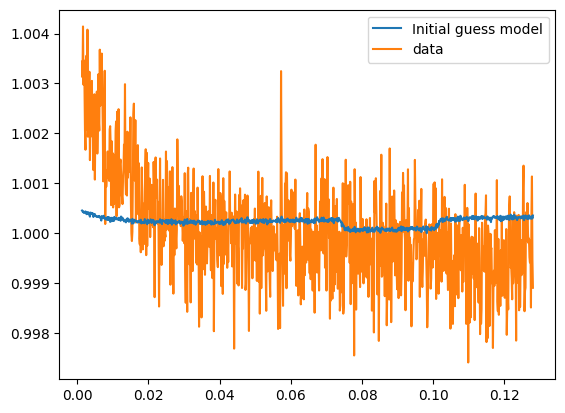

In [4]:
fit = erebus.individual_fits[0]
mcmc = fit.mcmc
initial_guess = np.array([mcmc.params[p].value for p in mcmc.params])[:-1]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *initial_guess)

plt.plot(t, f_model, label='Initial guess model', zorder=3)
plt.plot(t, f, label='data')
plt.legend()
plt.show()

In [5]:
erebus.run(output_folder="./test_output/", force_clear_cache=True)

No currently saved data
Initial guesses: [0.08793104333977175, 0.0002, 2458786.75425, 0.0462, 16.119, 1.9495378, 87.452, 0.1, 0.1, 0.1, 0.1, 0.1, 0.001, 1e-06, 0.0004] variation: [0.0016360163768509945, 0.000325, 0.00021, 0.00055, 0.047, 2.05e-06, 0.026, 2.475, 2.475, 2.475, 2.475, 2.475, 0.49975, 0.0024997500000000002, 0.0001]
Initial likelihood: 3124.8668630132834
Fitting for 15 parameters


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.46it/s]


Moved away from starting positions for chain # 0


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.45it/s]


Moved away from starting positions for chain # 1
Initial guesses shape: (2, 64, 15)
Mean likelihood at start: 5214.504133056359
Processing chain #0
Processing chain #1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [15:32<00:00, 10.72it/s]


Rubin gelman convergence: [0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922] converged? True
Autocorr time: 169.46155459333167 converged? True
Iterations: 0 Max steps: 200000
Continue looping? False
Autocorr time: 169.46155459333167
{'t_sec': 0.08887838272377901+/-0.0021414148890394197, 'fp': -0.00013364214621554226+/-7.483232875818928e-05, 't0': 2458786.7542526824+/-0.0004221494309604168, 'rp_rstar': 0.04622308154893647+/-0.0010921159664795538, 'a_rstar': 16.115656054151806+/-0.09268960400007309, 'p': 1.9495377713015776+/-4.129580568945634e-06, 'inc': 87.4565133326843+/-0.05200971480090999, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 1.1585493085038223+/-0.1227622639734578, 'pc2': 1.0944812374511357+/-0.09564398523085033, 'pc3': 0.05100223088997503+/-0.20830684057838061, 'pc4': 0.13376068835045463+/-0.18663973395089034, 'pc5': -0.1480805332854236+/-0.22271165541613386, 'exp1'

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:30<00:00, 11.06it/s]


Moved away from starting positions for chain # 1Moved away from starting positions for chain #
 0
Initial guesses shape: (2, 64, 15)
Mean likelihood at start: 5262.755499227655
Processing chain #0Processing chain #1



100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [15:36<00:00, 10.68it/s]


Rubin gelman convergence: [0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922 0.99999922
 0.99999922 0.99999922 0.99999922] converged? True
Autocorr time: 169.0511748357207 converged? True
Iterations: 0 Max steps: 200000
Continue looping? False
Autocorr time: 169.0511748357207
{'t_sec': 0.08854237169754958+/-0.0021076432582353283, 'fp': 0.00016003099603358853+/-6.895397447114524e-05, 't0': 2458786.7542440323+/-0.0004188339225947857, 'rp_rstar': 0.046169997573139845+/-0.001098918530509297, 'a_rstar': 16.128967932384107+/-0.09313826630921085, 'p': 1.949537783703288+/-4.035024909421203e-06, 'inc': 87.44407388308461+/-0.05255878937941816, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 0.043469061758331984+/-0.0464244920517482, 'pc2': -0.14436356460472258+/-0.10166152054117708, 'pc3': 0.21862595628397002+/-0.20707181774091574, 'pc4': -0.2225618189639865+/-0.19022206834930327, 'pc5': -0.3628043562167212+/-0.20996794901571128, 'exp1

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:24<00:00,  6.92it/s]


Moved away from starting positions for chain # 1
Moved away from starting positions for chain # 0
Initial guesses shape: (2, 80, 17)
Mean likelihood at start: 2919.955406269448
Processing chain #0
Processing chain #1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [24:04<00:00,  6.92it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [192.17894153 202.73487252 189.09716671 185.77660612 189.45965111
 205.56932798 204.29417703 196.98226145 190.1785774  200.1449793
 184.21687579 207.55812365 198.77868533 195.00055962 201.7415741
 200.52260483 198.33919284]
Rubin gelman convergence: [0.99999937 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937
 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937
 0.99999937 0.99999937 0.99999937 0.99999937 0.99999937] converged? True
Autocorr time: inf converged? False
Iterations: 0 Max steps: 200000
Continue looping? True
Processing chain #0
Processing chain #1


100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [24:03<00:00,  6.93it/s]


Rubin gelman convergence: [0.99999969 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969
 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969
 0.99999969 0.99999969 0.99999969 0.99999969 0.99999969] converged? True
Autocorr time: 217.78154509545726 converged? True
Iterations: 10000 Max steps: 200000
Continue looping? False
Autocorr time: 217.78154509545726
{'t_sec_offset': 1.2820170641089233e-05+/-0.00324198781606176, 'fp': -1.943354972648692e-06+/-5.2960854594233413e-05, 't0': 2458786.75425+/-0, 'rp_rstar': 0.0462+/-0, 'a_rstar': 16.119+/-0, 'p': 1.9495378+/-0, 'inc': 87.452+/-0, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1_0': -0.042471126865271845+/-0.14905812685003647, 'pc2_0': -0.10905149033214148+/-0.11237597515179365, 'pc3_0': 0.34907309386844476+/-0.3117680500802984, 'pc4_0': -0.27434522817398177+/-0.4046375203247893, 'pc5_0': -0.5664499022107361+/-0.3566018039589663, 'exp1_0': 0.0+/-0, 'exp2_0': 0.0+/-0, 'a_0': -0.007439004275140781+/-0.0014887450447165274, 'b_0': 0.00

In [6]:
from erebus.joint_fit_results import JointFitResults
res = JointFitResults(erebus.joint_fit)
len(res.model_time_per_visit[0])
len(res.model_flux_per_visit[0])

1000

2


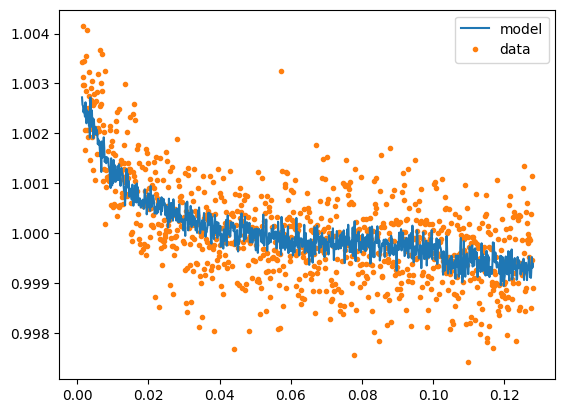

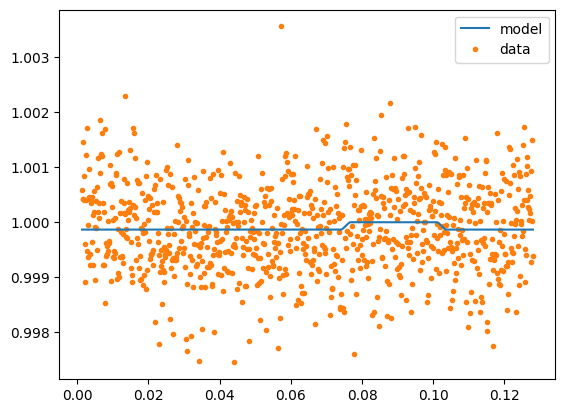

(-1.3+/-0.7)e+02


In [7]:
fit = erebus.individual_fits[0]
print(fit.order)

res = fit.results
res_nominal_values = [res[k].nominal_value for k in res][:-1]
physical_params = res_nominal_values[:9]
systematic_params = res_nominal_values[9:]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *res_nominal_values)
plt.plot(t, f_model, label='model', zorder=3)
plt.plot(t, f, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

f_systematic = fit.systematic_model(t, *systematic_params)
plt.plot(t, f_model / f_systematic, label='model', zorder=3)
plt.plot(t, f / f_systematic, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

print(res['fp']*1e6)